In [36]:
import pandas as pd

In [37]:
housedata = pd.read_csv('/content/Housing.csv')
housedata.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [38]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [39]:
 housedata.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [40]:
y = housedata['Price']
y.shape

(21613,)

In [41]:
X = housedata[['Bedrooms', 'Sqft_living',
       'Sqft_lot']]
X.shape

(21613, 3)

In [42]:
import seaborn as sns

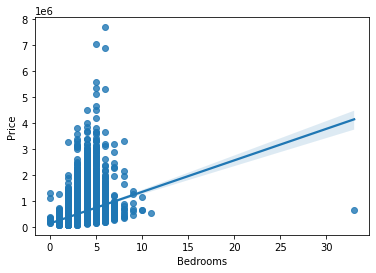

In [43]:
sns.regplot(x = 'Bedrooms', y = 'Price', data = housedata)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=5000)

In [45]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
reg.coef_

array([-1970803.64310261,  4268141.19654339,  -619512.44453619])

In [48]:
reg.intercept_

170625.77146970388

In [49]:
y_pred = reg.predict(X_test)
y_pred

array([ 119001.57629359,  220510.54903228, -202987.20928715, ...,
        349185.71733075,  891527.67408343,  149117.14831525])

In [50]:
y_test

15514    185000.0
12230    232603.0
7949     285000.0
19661    265000.0
7979     330000.0
           ...   
8746     351000.0
11981    324500.0
12283    695000.0
16781    845000.0
16201    290000.0
Name: Price, Length: 4323, dtype: float64

In [51]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7455.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:03:06   Log-Likelihood:            -2.9994e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         8.26e+04   6607.620     12.500      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
